In [2]:
import numpy as np
import visualization
import matplotlib.pyplot as plt
from scipy.stats import norm, multivariate_normal
from sklearn.mixture import GaussianMixture
import re
from itertools import groupby,islice

Plot with missing values(as 0)

In [45]:
# filepath = 'Assignment3_dataset_missing_values.txt'
filepath1 = 'Assignment3_dataset_missing_values.txt'
# fp = open("file")
# for i, line in enumerate(fp):
with open(filepath1) as f:
    content = f.readlines()
data = []
sep = []
a = 0
# for line in content:
for i, line in enumerate(content):
    if re.match('W', line):
        sep.append(i+a)
        a = a-1
        continue
    d = []
    for x in line.strip().split('\t'):
        d.append(float(x))
    data.append(d)
arr = np.asarray(data) 

w1 = arr[sep[0]:sep[1],:]
w2 = arr[sep[1]:sep[2],:]
w3 = arr[sep[2]:,:]

w_missing_value = []
w_missing_value.append(w1)
w_missing_value.append(w2)
w_missing_value.append(w3)
w_missing_value = np.concatenate(w_missing_value)
print(w_missing_value)


[[ 4.2e-01 -8.7e-02  5.8e-01]
 [-2.0e-01 -3.3e+00  0.0e+00]
 [ 1.3e+00 -3.2e-01  1.7e+00]
 [ 3.9e-01  7.1e-01  0.0e+00]
 [-1.6e+00 -5.3e+00 -1.5e-01]
 [-2.9e-02  8.9e-01  0.0e+00]
 [-2.3e-01  1.9e+00  2.2e+00]
 [ 2.7e-01 -3.0e-01  0.0e+00]
 [-1.9e+00  7.6e-01 -2.1e+00]
 [ 8.7e-01 -1.0e+00  0.0e+00]
 [-4.0e-01  5.8e-01  8.9e-02]
 [-3.1e-01  2.7e-01 -4.0e-02]
 [ 3.8e-01  5.5e-02 -3.5e-02]
 [-1.5e-01  5.3e-01  1.1e-02]
 [-3.5e-01  4.7e-01  3.4e-02]
 [ 1.7e-01  6.9e-01  1.0e-01]
 [-1.1e-02  5.5e-01 -1.8e-01]
 [-2.7e-01  6.1e-01  1.2e-01]
 [-6.5e-02  4.9e-01  1.2e-03]
 [-1.2e-01  5.4e-02 -6.3e-02]
 [ 8.3e-01  1.6e+00 -1.4e-02]
 [ 1.1e+00  1.6e+00  4.8e-01]
 [-4.4e-01 -4.1e-01  3.2e-01]
 [ 4.7e-02 -4.5e-01  1.4e+00]
 [ 2.8e-01  3.5e-01  3.1e+00]
 [-3.9e-01 -4.8e-01  1.1e-01]
 [ 3.4e-01 -7.9e-02  1.4e-01]
 [-3.0e-01 -2.2e-01  2.2e+00]
 [ 1.1e+00  1.2e+00 -4.6e-01]
 [ 1.8e-01 -1.1e-01 -4.9e-01]]


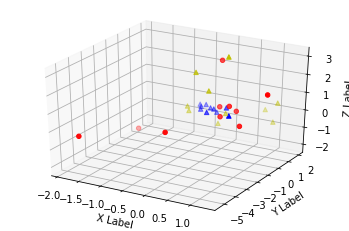

In [46]:
xs =w1[:, 0]
ys =w1[:, 1]
zs =w1[:, 2]

xt =w2[:, 0]
yt =w2[:, 1]
zt =w2[:, 2]

xg =w3[:, 0]
yg =w3[:, 1]
zg =w3[:, 2]
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs, ys, zs, c='r', marker='o')
ax.scatter(xt, yt, zt, c='b', marker='^')
ax.scatter(xg, yg, zg, c='y', marker='^')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


mean of dataset with missing value is:
[[ 0.22409123  0.06984335 -0.89917048]
 [ 0.27327594  0.36862071 -4.29833235]
 [ 2.12751345 -0.05280596 -0.07496216]]
cov of dataset with missing value is:
[[0.58374002 0.6214977  0.70085255]
 [0.87266456 0.62783275 1.00258282]
 [0.58875228 0.50271808 0.07500903]]


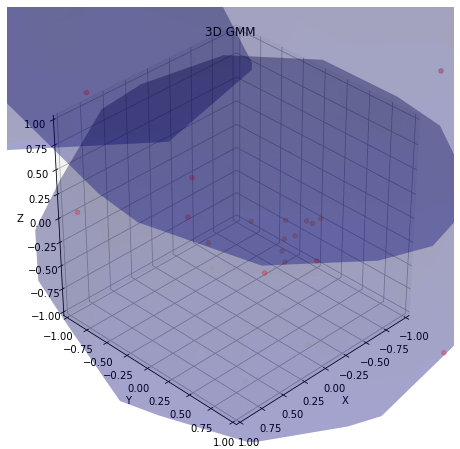

In [58]:
# gmm = GaussianMixture(n_components=n_gaussians, covariance_type='diag')
gmm1 = GaussianMixture(n_components=3, covariance_type='diag', max_iter = 600, random_state = 3)
gmm1.means_ = np.zeros(3)
gmm1.covariances_ = np.identity(3)
gmm1.fit(w_missing_value)
print("mean of dataset with missing value is:")
print(gmm1.means_.T)
print("cov of dataset with missing value is:")
print(np.sqrt(gmm1.covariances_).T)
# print(gmm1.weights_)
visualization.visualize_3d_gmm(w_missing_value, gmm1.weights_, gmm1.means_.T, np.sqrt(gmm1.covariances_).T)


since grid is too small for the plot, I plot it with scaled values for demonstration

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


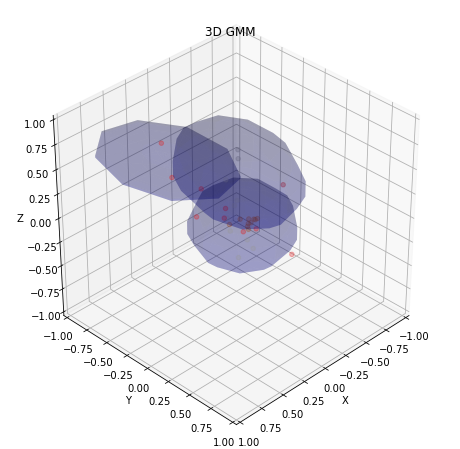

In [55]:
gmm1 = GaussianMixture(n_components=3, covariance_type='diag', max_iter = 600, random_state = 3)
gmm1.means_ = np.zeros(3)
gmm1.covariances_ = np.identity(3)
gmm1.fit(w_missing_value/4)
# print(gmm1.means_.T)
# print(np.sqrt(gmm1.covariances_).T)
# print(gmm1.weights_)
visualization.visualize_3d_gmm(w_missing_value/4, gmm1.weights_, gmm1.means_.T, np.sqrt(gmm1.covariances_).T)

Plot with no missing values

In [15]:
filepath2 = 'Assignment3_dataset.txt'
with open(filepath2) as f:
    content = f.readlines()
data = []
sep = []
a = 0
# for line in content:
for i, line in enumerate(content):
    if re.match('W', line):
        sep.append(i+a)
        a = a-1
        continue
    d = []
    for x in line.strip().split('\t'):
        d.append(float(x))
    data.append(d)
arr = np.asarray(data) 

w1 = arr[sep[0]:sep[1],:]
w2 = arr[sep[1]:sep[2],:]
w3 = arr[sep[2]:,:]

w_full_value = []
w_full_value.append(w1)
w_full_value.append(w2)
w_full_value.append(w3)
w_full_value = np.concatenate(w_full_value)
print(w_full_value)


[[ 4.2e-01 -8.7e-02  5.8e-01]
 [-2.0e-01 -3.3e+00 -3.4e+00]
 [ 1.3e+00 -3.2e-01  1.7e+00]
 [ 3.9e-01  7.1e-01  2.3e-01]
 [-1.6e+00 -5.3e+00 -1.5e-01]
 [-2.9e-02  8.9e-01 -4.7e+00]
 [-2.3e-01  1.9e+00  2.2e+00]
 [ 2.7e-01 -3.0e-01 -8.7e-01]
 [-1.9e+00  7.6e-01 -2.1e+00]
 [ 8.7e-01 -1.0e+00 -2.6e+00]
 [-4.0e-01  5.8e-01  8.9e-02]
 [-3.1e-01  2.7e-01 -4.0e-02]
 [ 3.8e-01  5.5e-02 -3.5e-02]
 [-1.5e-01  5.3e-01  1.1e-02]
 [-3.5e-01  4.7e-01  3.4e-02]
 [ 1.7e-01  6.9e-01  1.0e-01]
 [-1.1e-02  5.5e-01 -1.8e-01]
 [-2.7e-01  6.1e-01  1.2e-01]
 [-6.5e-02  4.9e-01  1.2e-03]
 [-1.2e-01  5.4e-02 -6.3e-02]
 [ 8.3e-01  1.6e+00 -1.4e-02]
 [ 1.1e+00  1.6e+00  4.8e-01]
 [-4.4e-01 -4.1e-01  3.2e-01]
 [ 4.7e-02 -4.5e-01  1.4e+00]
 [ 2.8e-01  3.5e-01  3.1e+00]
 [-3.9e-01 -4.8e-01  1.1e-01]
 [ 3.4e-01 -7.9e-02  1.4e-01]
 [-3.0e-01 -2.2e-01  2.2e+00]
 [ 1.1e+00  1.2e+00 -4.6e-01]
 [ 1.8e-01 -1.1e-01 -4.9e-01]]


In [16]:
# plt.plot(w_full_value[:, 0], w_full_value[:, 1], w_full_value[:, 2])
# plt.tight_layout()

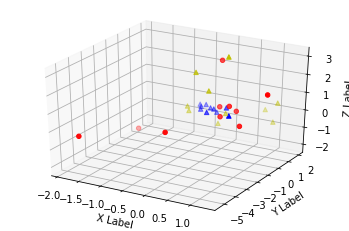

In [50]:
xs =w1[:, 0]
ys =w1[:, 1]
zs =w1[:, 2]

xt =w2[:, 0]
yt =w2[:, 1]
zt =w2[:, 2]

xg =w3[:, 0]
yg =w3[:, 1]
zg =w3[:, 2]
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs, ys, zs, c='r', marker='o')
ax.scatter(xt, yt, zt, c='b', marker='^')
ax.scatter(xg, yg, zg, c='y', marker='^')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


mean of dataset without missing value is:
[[ 0.22753019 -0.50822694  0.12709438]
 [ 0.26307233 -1.47749345  0.40103678]
 [ 2.09638656 -2.4453156   0.01156047]]
cov of dataset without missing value is:
[[0.58048759 1.02946716 0.4629596 ]
 [0.87141434 2.35712884 0.57422817]
 [0.60780678 1.55651644 0.30503019]]


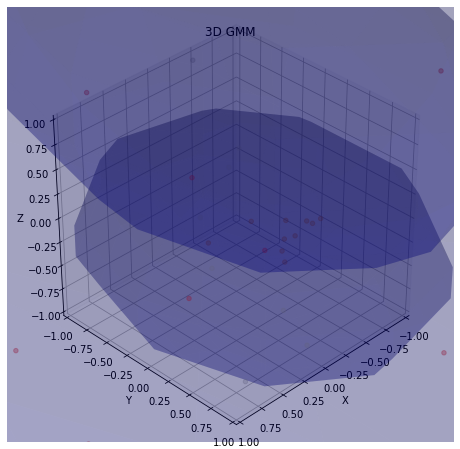

In [59]:
gmm2 = GaussianMixture(n_components=3, covariance_type='diag', max_iter = 600, random_state = 3)
gmm2.means_ = np.zeros(3)
gmm2.covariances_ = np.identity(3)
gmm2.fit(w_full_value)
print("mean of dataset without missing value is:")
print(gmm2.means_.T)
print("cov of dataset without missing value is:")
print(np.sqrt(gmm2.covariances_).T)
# print(gmm1.weights_)
visualization.visualize_3d_gmm(w_full_value, gmm2.weights_, gmm2.means_.T, np.sqrt(gmm2.covariances_).T)

since grid is too small for the plot, I plot it with scaled values for demonstration

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


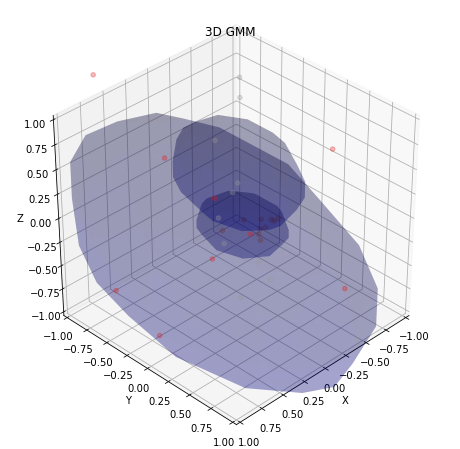

In [63]:
gmm2 = GaussianMixture(n_components=3, covariance_type='diag', max_iter = 600, random_state = 3)
gmm2.means_ = np.zeros(3)
gmm2.covariances_ = np.identity(3)
gmm2.fit(w_full_value/4)
# print(gmm2.means_.T)
# print(np.sqrt(gmm2.covariances_).T)
# print(gmm1.weights_)
visualization.visualize_3d_gmm(w_full_value/2, gmm2.weights_, gmm2.means_.T, np.sqrt(gmm2.covariances_).T)

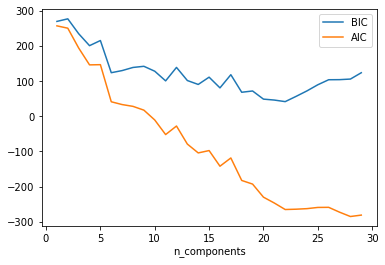

In [72]:
X=w_missing_value
def testGMMsklearnBICAIC():
    n_components = np.arange(1, 30)
    clfs = [GaussianMixture(n, max_iter = 1000).fit(X) for n in n_components]
    bics = [clf.bic(X) for clf in clfs]
    aics = [clf.aic(X) for clf in clfs]
    
    plt.plot(n_components, bics, label = 'BIC')
    plt.plot(n_components, aics, label = 'AIC')
    plt.xlabel('n_components')
    plt.legend()
    plt.show()  
testGMMsklearnBICAIC()

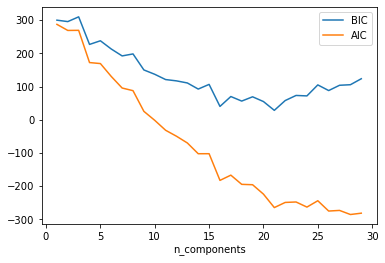

In [73]:
X=w_full_value
def testGMMsklearnBICAIC():
    n_components = np.arange(1, 30)
    clfs = [GaussianMixture(n, max_iter = 1000).fit(X) for n in n_components]
    bics = [clf.bic(X) for clf in clfs]
    aics = [clf.aic(X) for clf in clfs]
    
    plt.plot(n_components, bics, label = 'BIC')
    plt.plot(n_components, aics, label = 'AIC')
    plt.xlabel('n_components')
    plt.legend()
    plt.show()
       
testGMMsklearnBICAIC()

In [ ]:
 # Model parameters, including the mean
# covariance matrix and the weights for each cluster
init_means = np.array([
    [5, 0],
    [1, 1],
    [0, 5]
])

init_covariances = np.array([
    [[.5, 0.], [0, .5]],
    [[.92, .38], [.38, .91]],
    [[.5, 0.], [0, .5]]
])

init_weights = [1 / 4, 1 / 2, 1 / 4]

# generate data
np.random.seed(4)
X = generate_data(30, init_means, init_covariances, init_weights)

# X = w_full_value

#plt.plot(X[:, 0], X[:, 1], 'ko')
#plt.tight_layout()

n_components = np.arange(1, 30)
clfs = [GaussianMixture(n, max_iter = 1000).fit(X) for n in n_components]
bics = [clf.bic(X) for clf in clfs]
aics = [clf.aic(X) for clf in clfs]

plt.plot(n_components, bics, label = 'BIC')
plt.plot(n_components, aics, label = 'AIC')
plt.xlabel('n_components')
plt.legend()
plt.show()

In [78]:
def generate_data(n_data, means, covariances, weights):
    """creates a list of data points"""
#     3x2
    n_clusters, n_features = means.shape
    data = np.zeros((n_data, n_features))
#     [[0. 0.]
#      [0. 0.]
#      [0. 0.]
#      [0. 0.]
#     print(data)
    for i in range(n_data):
        # pick a cluster id and create data from this cluster
        k = np.random.choice(n_clusters, size = 1, p = weights)[0]
        x = np.random.multivariate_normal(means[k], covariances[k])
        data[i] = x
#         [0.31845368 5.03182099]
#         [1.45029339 2.15717573]
#         [1.02645431 4.76042375]
#         [ 5.23493625 -0.81138851]
#         [ 4.65710743 -0.08532351]
#         print(x)
#     print(data)
    return data

In [81]:
# Model parameters, including the mean
# covariance matrix and the weights for each cluster
init_means = np.array([
    [5, 0],
    [1, 1],
    [0, 5]
])

init_covariances = np.array([
    [[.5, 0.], [0, .5]],
    [[.92, .38], [.38, .91]],
    [[.5, 0.], [0, .5]]
])

init_weights = [1 / 4, 1 / 2, 1 / 4]
  
# generate data
np.random.seed(4)
X = generate_data(30, init_means, init_covariances, init_weights)

# plt.plot(X[:, 0], X[:, 1], 'ko')
# plt.tight_layout()
# print(X)

[[ 0.31845368  5.03182099]
 [ 1.45029339  2.15717573]
 [ 1.02645431  4.76042375]
 [ 5.23493625 -0.81138851]
 [ 4.65710743 -0.08532351]
 [ 0.43746553  4.93778385]
 [-0.12756373  5.14296293]
 [ 4.18200738  0.24819247]
 [ 1.65646672 -0.87991369]
 [-0.69508006  5.03848976]
 [ 6.01348014  1.87722666]
 [ 0.20099208 -0.93213203]
 [-0.38268222  0.26365374]
 [ 5.03394554 -1.66740986]
 [ 1.53889119 -0.12731715]
 [ 0.81448617  1.63543709]
 [ 1.7219243   0.28460715]
 [ 4.90757786  0.56716088]
 [ 0.60512066  4.87555125]
 [ 1.30867865 -0.58711045]
 [ 0.19570654  5.73836612]
 [ 3.97078181  0.39328234]
 [ 0.47190777  1.47637309]
 [ 1.32157017  0.56486368]
 [ 3.89988459  0.92433204]
 [ 0.11205488  6.4072012 ]
 [ 0.40717315  1.67134485]
 [ 0.56231532  5.01349864]
 [ 1.82113515  0.78892223]
 [-0.77578232  4.62650898]]


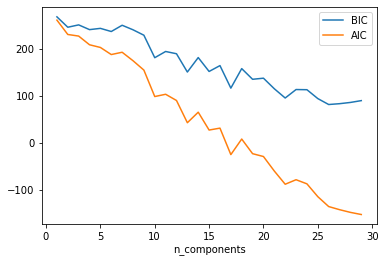

In [82]:
# X=w_missing_value
def testGMMsklearnBICAIC():
    n_components = np.arange(1, 30)
    clfs = [GaussianMixture(n, max_iter = 1000).fit(X) for n in n_components]
    bics = [clf.bic(X) for clf in clfs]
    aics = [clf.aic(X) for clf in clfs]
    
    plt.plot(n_components, bics, label = 'BIC')
    plt.plot(n_components, aics, label = 'AIC')
    plt.xlabel('n_components')
    plt.legend()
    plt.show()
       
testGMMsklearnBICAIC()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cmx
import os

def visualize_3d_gmm(points, w, mu, stdev, export=True):
    '''
    plots points and their corresponding gmm model in 3D
    Input: 
        points: N X 3, sampled points
        w: n_gaussians, gmm weights
        mu: 3 X n_gaussians, gmm means
        stdev: 3 X n_gaussians, gmm standard deviation (assuming diagonal covariance matrix)
    Output:
        None
    '''

    n_gaussians = mu.shape[1]
    N = int(np.round(points.shape[0] / n_gaussians))
    # Visualize data
    fig = plt.figure(figsize=(8, 8))
    axes = fig.add_subplot(111, projection='3d')
    axes.set_xlim([-1, 1])
    axes.set_ylim([-1, 1])
    axes.set_zlim([-1, 1])
    plt.set_cmap('Set1')
    colors = cmx.Set1(np.linspace(0, 1, n_gaussians))
    for i in range(n_gaussians):
        idx = range(i * N, (i + 1) * N)
        axes.scatter(points[idx, 0], points[idx, 1], points[idx, 2], alpha=0.3, c=colors[i])
        plot_sphere(w=w[i], c=mu[:, i], r=stdev[:, i], ax=axes)

    plt.title('3D GMM')
    axes.set_xlabel('X')
    axes.set_ylabel('Y')
    axes.set_zlabel('Z')
    axes.view_init(35.246, 45)
    if export:
        if not os.path.exists('images/'): os.mkdir('images/')
        plt.savefig('images/3D_GMM_demonstration.png', dpi=100, format='png')
    plt.show()


def plot_sphere(w=0, c=[0,0,0], r=[1, 1, 1], subdev=10, ax=None, sigma_multiplier=3):
    '''
        plot a sphere surface
        Input: 
            c: 3 elements list, sphere center
            r: 3 element list, sphere original scale in each axis ( allowing to draw elipsoids)
            subdiv: scalar, number of subdivisions (subdivision^2 points sampled on the surface)
            ax: optional pyplot axis object to plot the sphere in.
            sigma_multiplier: sphere additional scale (choosing an std value when plotting gaussians)
        Output:
            ax: pyplot axis object
    '''

    if ax is None:
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
    pi = np.pi
    cos = np.cos
    sin = np.sin
    phi, theta = np.mgrid[0.0:pi:complex(0,subdev), 0.0:2.0 * pi:complex(0,subdev)]
    x = sigma_multiplier*r[0] * sin(phi) * cos(theta) + c[0]
    y = sigma_multiplier*r[1] * sin(phi) * sin(theta) + c[1]
    z = sigma_multiplier*r[2] * cos(phi) + c[2]
    cmap = cmx.ScalarMappable()
    cmap.set_cmap('jet')
    c = cmap.to_rgba(w)

    ax.plot_surface(x, y, z, color=c, alpha=0.2, linewidth=1)

    return ax

def visualize_2D_gmm(points, w, mu, stdev, export=True):
    '''
    plots points and their corresponding gmm model in 2D
    Input: 
        points: N X 2, sampled points
        w: n_gaussians, gmm weights
        mu: 2 X n_gaussians, gmm means
        stdev: 2 X n_gaussians, gmm standard deviation (assuming diagonal covariance matrix)
    Output:
        None
    '''
    n_gaussians = mu.shape[1]
    N = int(np.round(points.shape[0] / n_gaussians))
    # Visualize data
    fig = plt.figure(figsize=(8, 8))
    axes = plt.gca()
    axes.set_xlim([-1, 1])
    axes.set_ylim([-1, 1])
    plt.set_cmap('Set1')
    colors = cmx.Set1(np.linspace(0, 1, n_gaussians))
    for i in range(n_gaussians):
        idx = range(i * N, (i + 1) * N)
        plt.scatter(points[idx, 0], points[idx, 1], alpha=0.3, c=colors[i])
        for j in range(8):
            axes.add_patch(
                patches.Ellipse(mu[:, i], width=(j+1) * stdev[0, i], height=(j+1) *  stdev[1, i], fill=False, color=[0.0, 0.0, 1.0, 1.0/(0.5*j+1)]))
        plt.title('GMM')
    plt.xlabel('X')
    plt.ylabel('Y')

    if export:
        if not os.path.exists('images/'): os.mkdir('images/')
        plt.savefig('images/2D_GMM_demonstration.png', dpi=100, format='png')

    plt.show()